# Aplicación de GMM para clustering -> Segmentación 

_Jessenia Piza, Manuela Acosta & Sebastián Martínez_

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
from itertools import product

from sklearn.mixture import GaussianMixture

%matplotlib inline

np.random.seed(42)

La siguiente imagen es un linfocito normal de la sangre periférica

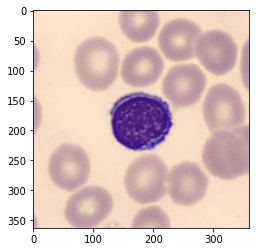

In [2]:
image = Image.open("linfo.jpg")
plt.imshow(image);

In [3]:
# Convierte la imagen a un array de numpy
im = np.asarray(image)
print(im.shape)

(363, 360, 3)


1. Utilice un modelo GMM para segmentar la imagen del linfocito en tres regiones. El resultado debe ser tres imágenes correspondientes a las probabilidades posteriores de las agrupaciones generadas con el modelo de GMM.

**Sugerencia.** Recuerde que cada pixel de la imagen está compuesta por tres valores R,G,B. Para convertir la imagen a un conjunto de datos de n filas x 3 columnas, utilice `np.reshape()` y de ahí podra usar el modelo GMM. Posteriormente, también deberar usar el reshape para volver cada columna de las probabilidades en una imagen de escala de grises con un tamaño de 363x360 (note que cada columna es solo es una matriz, porque es de escala de grises).

In [4]:
def gmm_function(X, covariance_type):
    gmm_model = GaussianMixture(n_components=3, covariance_type=covariance_type, random_state=42)
    gmm_model.fit(X)
    prob = gmm_model.predict_proba(X)
    fig, ax = plt.subplots(1, 3, figsize=(20,20))
    for i in range(prob.shape[1]):
        ax[i].imshow(prob[:,i].reshape((363,360)), cmap='gray')

In [5]:
X = im.reshape((im.shape[0]*im.shape[1],3))

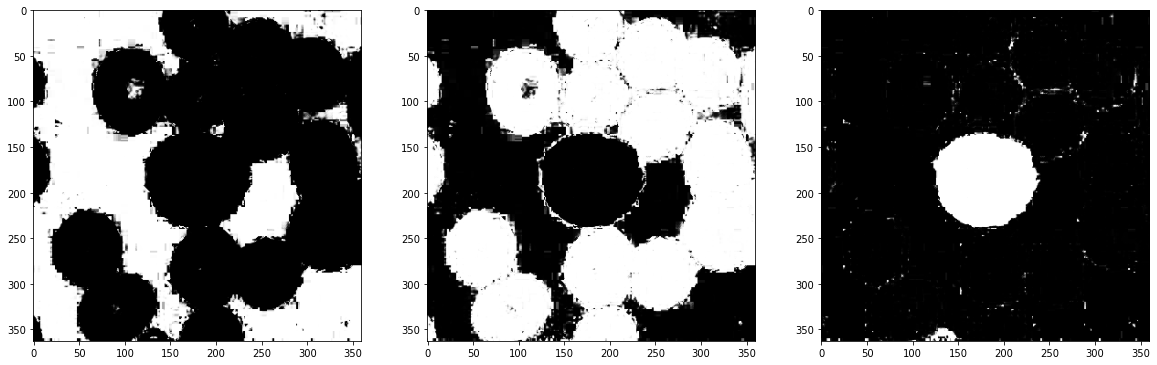

In [6]:
gmm_function(X, 'full')

2. Varie el tipo de covarianza mediante el parámetro del model `covariance_type` y determine "visualmente" que tipo de covarianza funciona mejor para la segmentación.

Anteriormente se utilizó el tipo de covarianza `full`. Ahora haremos uso de las covarianzas `tied`, `diag`, `spherical`.

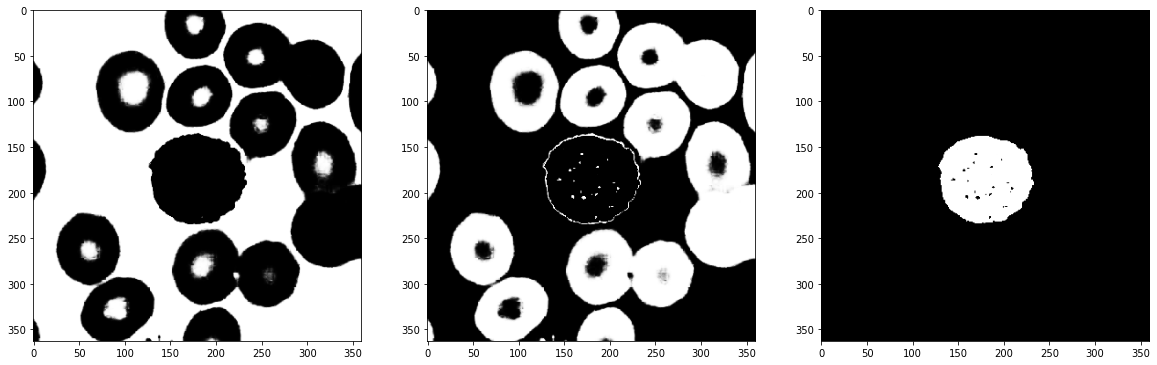

In [7]:
gmm_function(X, 'tied')

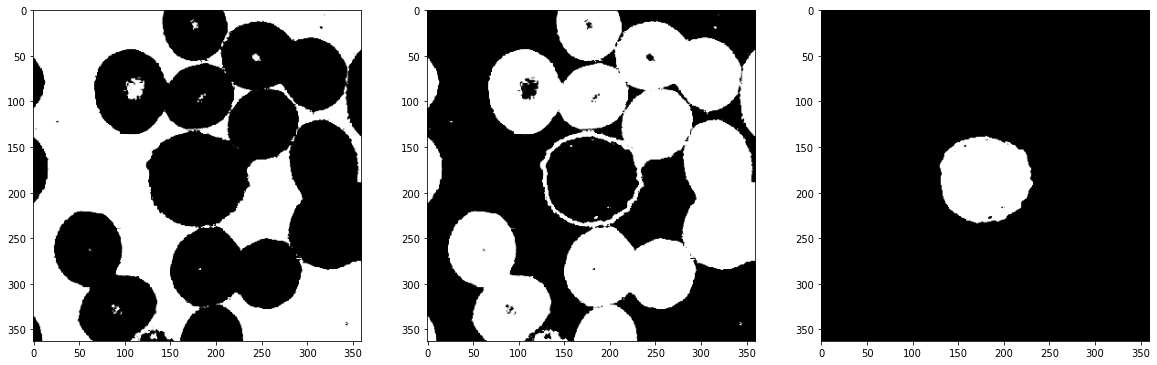

In [8]:
gmm_function(X, 'diag')

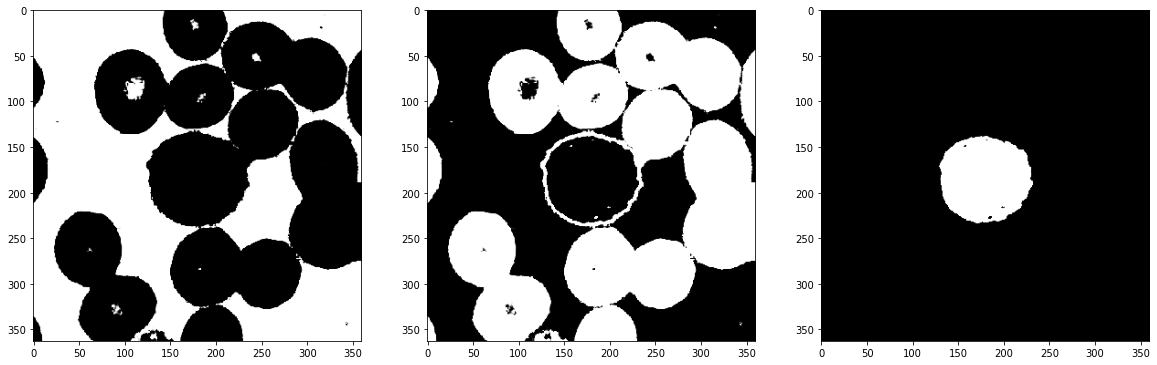

In [9]:
gmm_function(X, 'spherical')

Según los resultados observados anteriormente, visualmente la mejor covarianza al momento de utilizar el modelo GMM es `tied`. 

3. Con el tipo de varianza escogida, mediante la métrica BIC o AIC (es un método del modelo) determine si es mejor tener 3 o 4 clusters. Compruebelo visualmente.

In [10]:
gmm_model4 = GaussianMixture(n_components=4, covariance_type='tied', random_state=42)
gmm_model4.fit(X)
prob4 = gmm_model4.predict_proba(X)

In [11]:
gmm_model4.bic(X)

2733650.4164587767

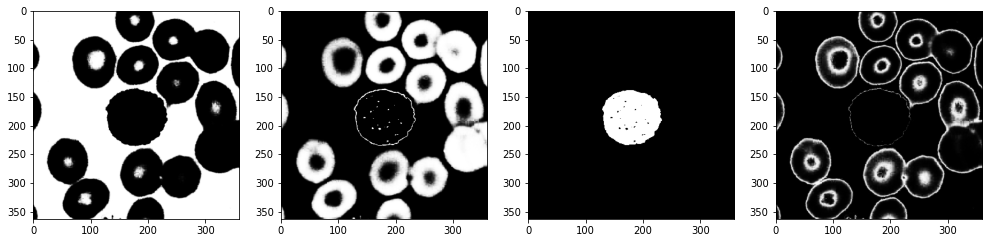

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(17,17))
for i in range(prob4.shape[1]):
    ax[i].imshow(prob4[:,i].reshape((363,360)), cmap='gray')

In [13]:
gmm_model3 = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
gmm_model3.fit(X)
prob3 = gmm_model3.predict_proba(X)

In [14]:
gmm_model3.bic(X)

2736538.203669701

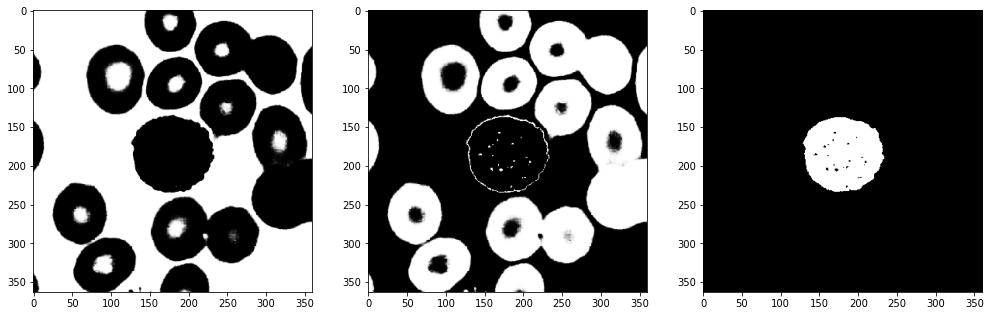

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(17,17))
for i in range(prob3.shape[1]):
    ax[i].imshow(prob3[:,i].reshape((363,360)), cmap='gray')

Utilizando la métrica `bic` observamos que el modelo con 4 componentes, tiene un mejor resultado. Sin embargo, la diferencia entre las métricas con 3 y 4 componentes es muy pequeña. Al analizarlo visualmente, comprobamos que, efectivamente, se obtienen mejores resultados con 4 componentes, sin embargo, al ser tan pequeña la diferencia en las métricas podemos ver que con 3 componentes también se obtienen buenos resultados.

4. ¿Por qué el núcleo no se logra segmentar? ¿Cómo podría lograr segmentar el núcleo (de forma simple)? Compruebelo. 

No se logra segmentar debido a que el número de clusters es reducido. Aumentando los clusters y observando con qué covarianza se segmenta mejor se podría segmenttar el núcleo.

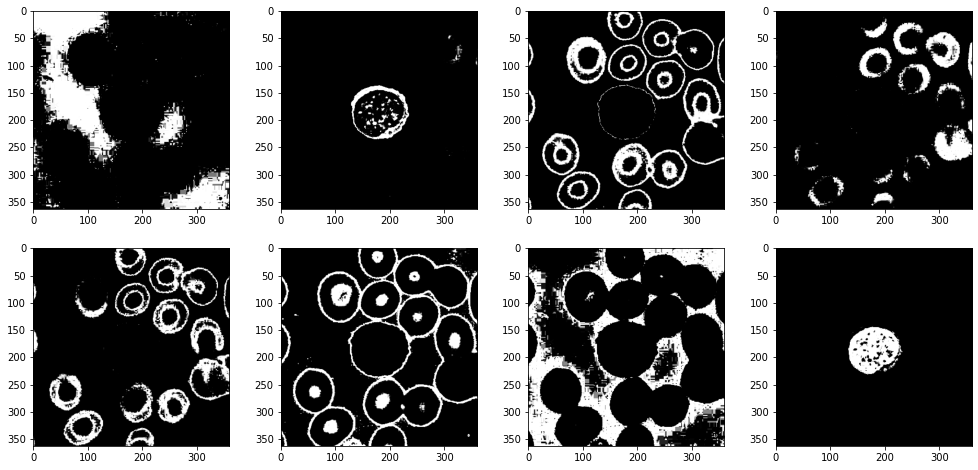

In [16]:
gmm_model = GaussianMixture(n_components=8, covariance_type='diag', random_state=42)
gmm_model.fit(X)
prob = gmm_model.predict_proba(X)

fig, ax = plt.subplots(2, 4, figsize=(17,8))
for i in range(prob.shape[1]):
    if i%2 == 0:
        ax[0,i//2].imshow(prob[:,i].reshape((363,360)), cmap='gray')
    else:
        ax[1,i//2].imshow(prob[:,i].reshape((363,360)), cmap='gray')

Note que, aumentando el número de clusters a 8 se logra identificar el núcleo del linfocito.

5. Realice la segmentación para las imágenes de la carpeta `test_set`. Visualice las segmentaciónes (un sólo grid) y grafique la métrica de AIC o BIC (por ejm barras).

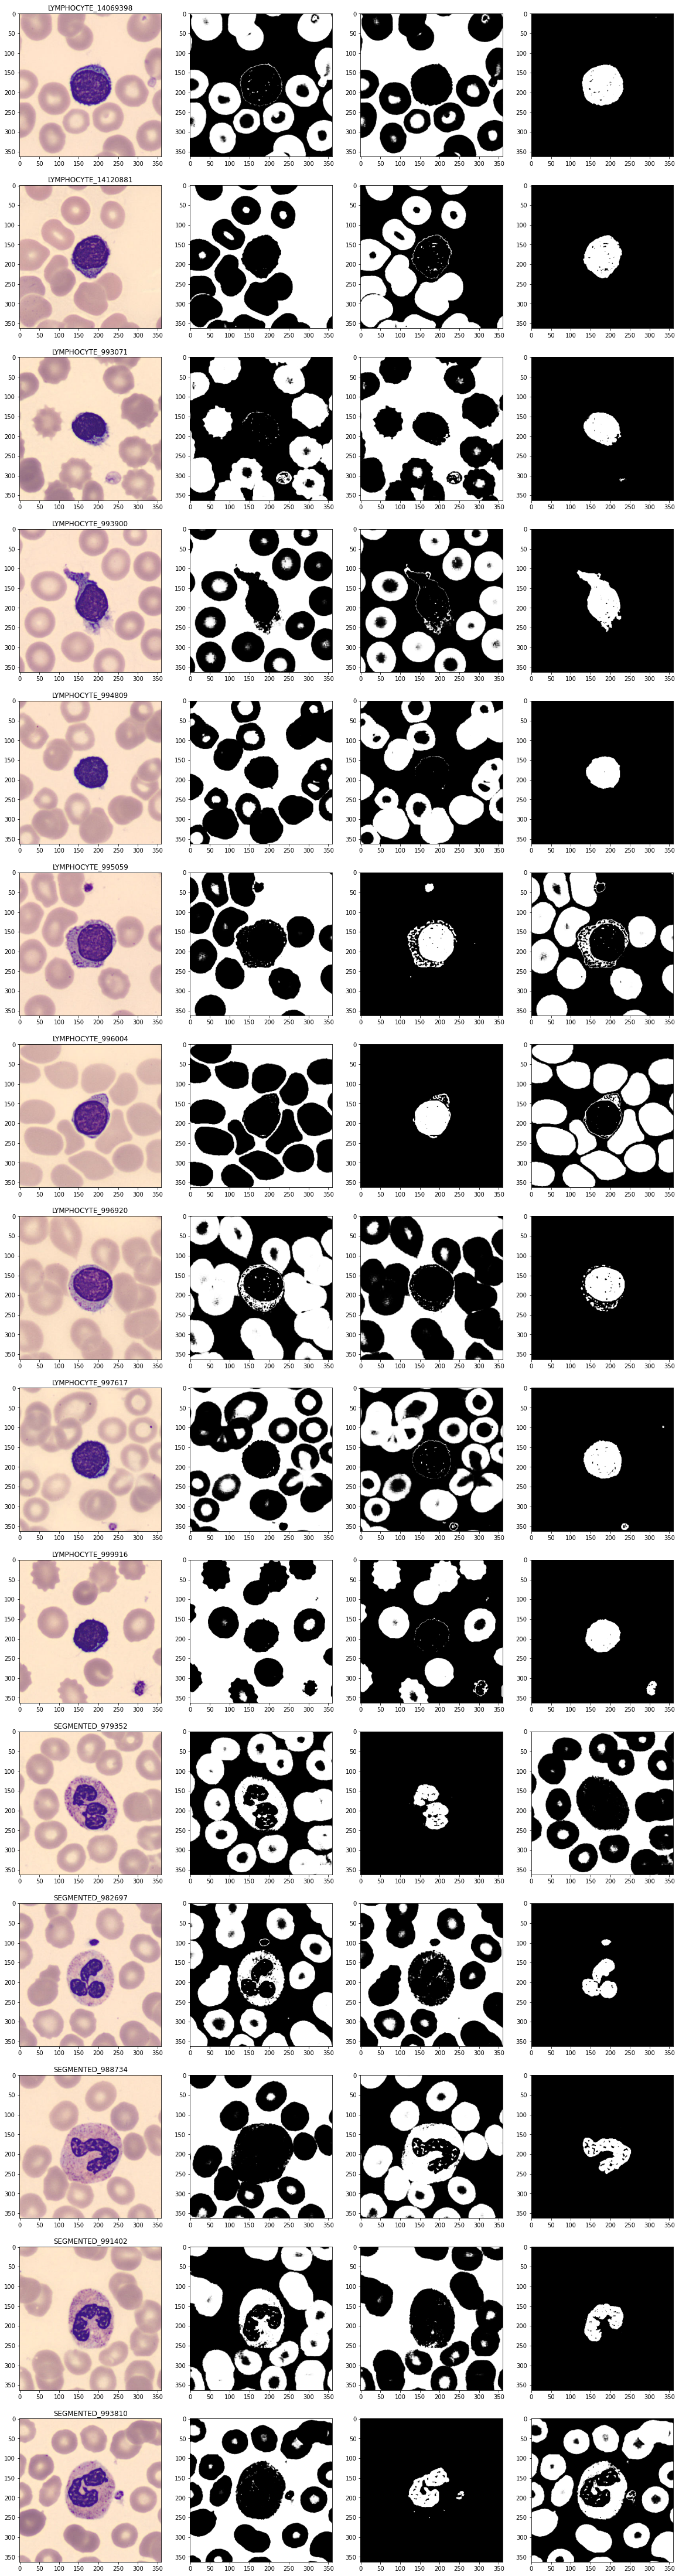

In [19]:
clusters = 3
fig, ax = plt.subplots(len(os.listdir('data_test')), clusters+1, figsize=(20,20*(clusters+1)))
bic_list = []
for q, im in enumerate(os.listdir('data_test')):
    image = Image.open('data_test'+'/'+im)
    ima = np.asarray(image)
    X = ima.reshape((ima.shape[0]*ima.shape[1],3))
    gmm_model = GaussianMixture(n_components=clusters, covariance_type='tied', random_state=42)
    gmm_model.fit(X)
    prob = gmm_model.predict_proba(X)
    bic_list.append(gmm_model.bic(X))
    
    for i in product(range(q,q+1),range(clusters+1)):
        if i[1] == 0:
            ax[i].set_title(im[:-4])
            ax[i].imshow(image)
        else:
            ax[i].imshow(prob[:,i[1]-1].reshape((363,360)), cmap='gray')

<BarContainer object of 15 artists>

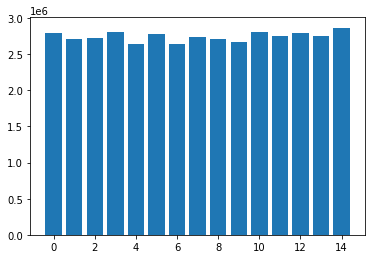

In [20]:
plt.bar(range(len(os.listdir('data_test'))), bic_list)

Nota: La segmentación que estamos realizando es no supervisada. Esto quiere decir, que para cada imagen se crea un modelo y se predicen las probabilidades posteriores de esa imagen. Es posible (y es fácil con sklearn) realizar un modelo no-supervisado a partir de los pesos y responsabilidades encontrados con una o varias imágenes y luego realizar la predicción con otras nuevas. Pero, en este ejercicio no lo estamos realizando así.

Nota 2: Es posible también obtener regiones segmentadas no suaves (usando `model.predict`). Sería interesante graficar dichas regiones con transparencia o bordes sobre las imágenes originales, para propósitos de visualización. Pero no es necesario para este ejercicio.

Nota 3: Es posible evaluar la segmentación de una forma más objetiva, determinando regiones no suaves, calculando una métrica de segmentación como el [índice Jaccard (o IOU)](https://en.wikipedia.org/wiki/Jaccard_index) y usando un ground truth (segmentaciones realizadas a mano).